# MLPRegressor, GridSearchCV
## Module import

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

## GridSearchCV training and testing

In [12]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/9-splits/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50), (100), (200)],
    'activation': ['tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}

# Optimized
param_grid = {
    'hidden_layer_sizes': [(200)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.1],
    'learning_rate_init': [0.01],
    'max_iter': [1000]
}

offset = '50'

train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))

# Split the data into features and target
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

# Initialize the MLPRegressor model
model = MLPRegressor(random_state=0)

# Perform grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # evaluation metric
    n_jobs=-1  # use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate the Directional Symmetry (hit rate)
hit_rate = (np.sign(y_pred) == np.sign(y_test)).mean()

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print("---")
print(f"Best  NMSE: {grid_search.best_score_:.3f}")
print("---")
print("Test set evaluation:")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")
print(f"Directional Symmetry (hit rate): {hit_rate:.2f}")

Best parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 200, 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}
---
Best  NMSE: -0.013
---
Test set evaluation:
MSE: 0.009
MAE: 0.059
MAPE: 1.820
Directional Symmetry (hit rate): 0.85


## Plot test set and prediction set

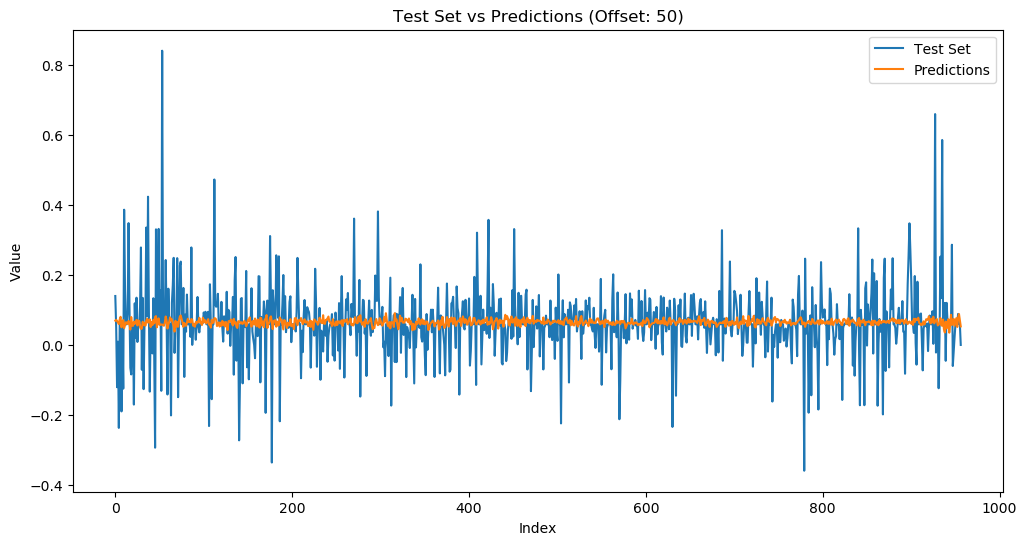

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()